# Spring Simulation (Assignment 1)

In [1]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1. Write a program to execute the Euler and Verlet algorithms for the mass on the spring, and plot the
trajectories of the dynamical variables as functions of time. Convince yourself that the programs work by
solving the equation of motion analytically. To get you started, a Python script for the Euler method is
provided on the Moodle course page.

In [2]:
# Equation of Motion Function (Passed to integrators)
def accel_function(r, k=1, m=1):
    return (-k * r / m)

# Euler integration
def euler_method(t_array, x0, v0, f):
    # initialise the t0 values
    x = x0
    v = v0
    # initialise empty lists to record trajectories
    x_list = []
    v_list = []

    for t in t_array:

        # append current state to trajectories
        x_list.append(x)
        v_list.append(v)

        # calculate new position and velocity
        a = f(x)
        x = x + dt * v
        v = v + dt * a
    
    return (x_list, v_list)

# Verlet Integration
def verlet_method(t_array, dt, x0, v0, f):
    # initialise the t0 values
    x = 0
    v = 0
    # initialise empty lists to record trajectories
    x_list = [x0, x0 + v0*dt]
    v_list = [v0]
    
    for t in t_array:
        # calculate new position and velocity
        x = 2*x_list[len(x_list)-1] - x_list[len(x_list)-2] + dt**2*(f(x))
        # dt - 1 velocity
        v = (1/(2*dt)) * (x - x_list[len(x_list)-2])
        
        x_list.append(x)
        v_list.append(v)

    x_list.pop()
    x_list.pop()
    v_list.pop()
    
    return (x_list, v_list)

Plot the trajectories as a function of time...

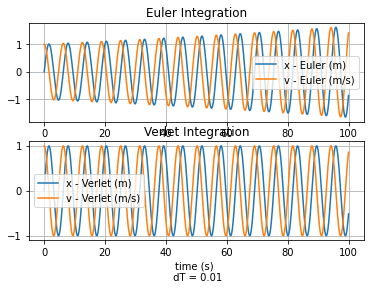

In [3]:
# simulation time, timestep and time
t_max = 100
dt = 0.01
t_array = np.arange(0, t_max, dt)

# Initial Conditions
x_nought = 0
v_nought = 1
# run the euler method
x_l_euler, v_l_euler = euler_method(t_array, x_nought, v_nought, accel_function)
# run the verlet method 
x_l_verlet, v_l_verlet = verlet_method(t_array, dt, x_nought, v_nought, accel_function)

# plot the result
# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
xe_array = np.array(x_l_euler)
ve_array = np.array(v_l_euler)
xv_array = np.array(x_l_verlet)
vv_array = np.array(v_l_verlet)

# plot the position-time graph
plt.figure(1)

plt.subplot(211)
plt.title("Euler Integration")
plt.grid()
plt.plot(t_array, xe_array, label='x - Euler (m)')
plt.plot(t_array, ve_array, label='v - Euler (m/s)')
plt.legend()

plt.subplot(212)
plt.grid()
plt.title("Verlet Integration")
plt.plot(t_array, xv_array, label='x - Verlet (m)')
plt.plot(t_array, vv_array, label='v - Verlet (m/s)')
plt.xlabel('time (s) \n dT = {:.2f}'.format(dt))
plt.legend()
plt.show()

2. Investigate the numerical solution for various different values of the time step ∆t. Compare the per-
formance of the two algorithms over several thousand oscillations, both with each other and also with the
exact analytical solution. For example, if you take m = k = v 0 = 1 and calculate the trajectory from t = 0
to t = 1000, you should find that the Verlet integrator is stable for ∆t = 1 but not for ∆t = 2.

In [4]:
def run(dt = 0.01):
    # simulation time, timestep and time
    t_max = 1000
    t_array = np.arange(0, t_max, dt)

    # Numerical Methods
    x_nought = 0
    v_nought = 1
    x_l_euler, v_l_euler = euler_method(t_array, x_nought, v_nought, accel_function)
    x_l_verlet, v_l_verlet = verlet_method(t_array, dt, x_nought, v_nought, accel_function)
    xe_array = np.array(x_l_euler)
    xv_array = np.array(x_l_verlet)

    # Exact solutions (k = m = 1)
    x_exact = np.sin(t_array)
    v_exact = np.cos(t_array)

    # plot the position-time graph
    plt.figure(1)

    plt.subplot(211)
    plt.title("Euler vs Exact")
    plt.grid()
    plt.plot(t_array, xe_array, label='x - Euler (m)')
    plt.plot(t_array, x_exact, label='x - Exact (m)')
    plt.legend()

    plt.subplot(212)
    plt.grid()
    plt.title("Verlet vs Exact")
    plt.plot(t_array, xv_array, label='x - Verlet (m)')
    plt.plot(t_array, x_exact, label='x - Exact (m)')
    plt.xlabel('time (s) \n dT = {:.2f}'.format(dt))
    plt.legend()
    plt.show()

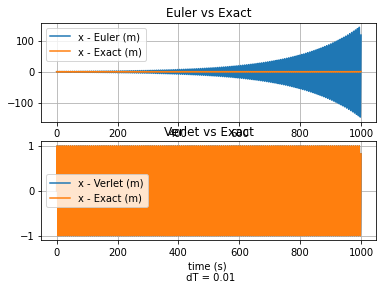

In [5]:
run(0.01)

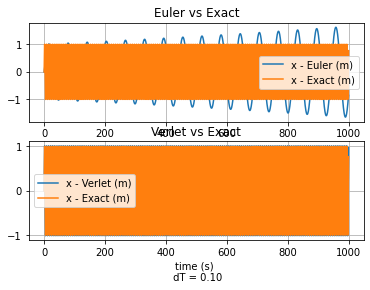

In [6]:
run(0.1)

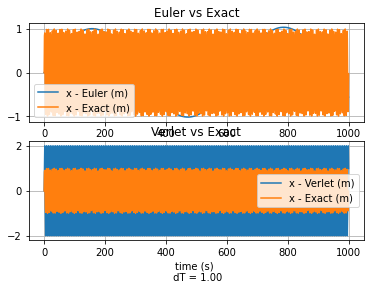

In [7]:
run(1)

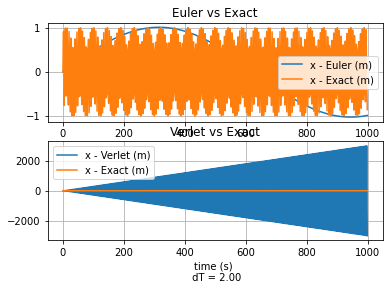

In [8]:
run(2)

3. Find, by trial and error, the critical value of ∆t for the Verlet case, above which it becomes unstable.
The first order Euler integrator is never completely stable, but gets better for smaller values of ∆t.

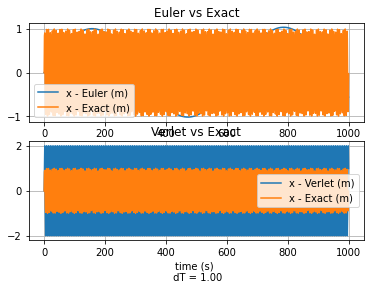

In [9]:
run(1)

Becomes progressively more variable as dT increases, with am modultion superimposed of increasing amplitude